In [139]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import normalize
%matplotlib inline

In [140]:
df = pd.read_csv('/Users/eduardorodriguez/Desktop/TFM/DATA/syndata/syndata.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')

In [106]:

randomState = 5
np.random.seed(randomState)

Y = X['isFraud']
del X['isFraud']

X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

# Binary-encoding of labelled data in 'type'
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int)
X.head()
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

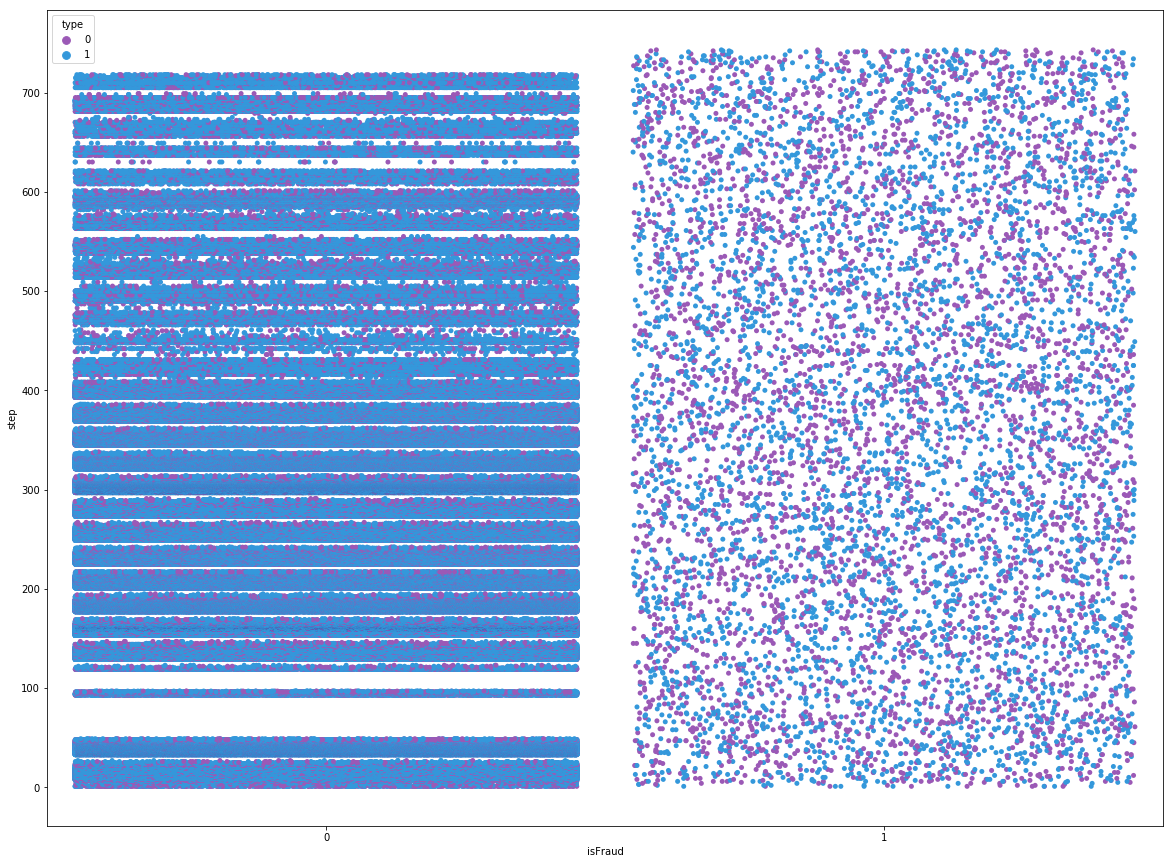

In [68]:
plt.subplots(figsize=(15,10))
ax = sns.stripplot(Y[:], X.step[:], X.type[:], jitter= 0.45, palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])

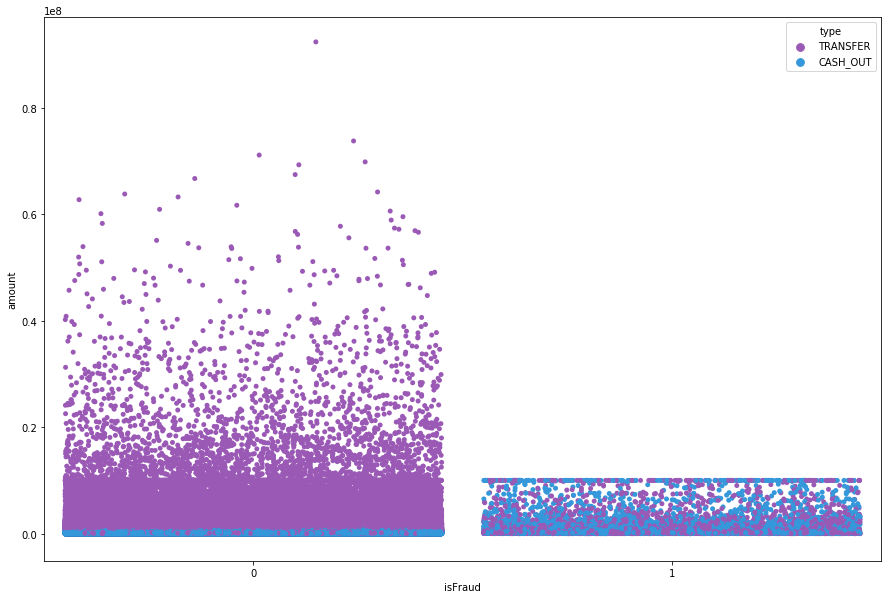

In [136]:
plt.subplots(figsize=(15,10))
ax = sns.stripplot(Y[:], X.amount[:], X.type[:], jitter= 0.45, palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])

In [75]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00
3,1,1,181.00,181.0,0.0,21182.0,0.00
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44
19,1,0,215310.30,705.0,0.0,22425.0,0.00
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89


/Users/eduardorodriguez/anaconda2/envs/TFM/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/eduardorodriguez/anaconda2/envs/TFM/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


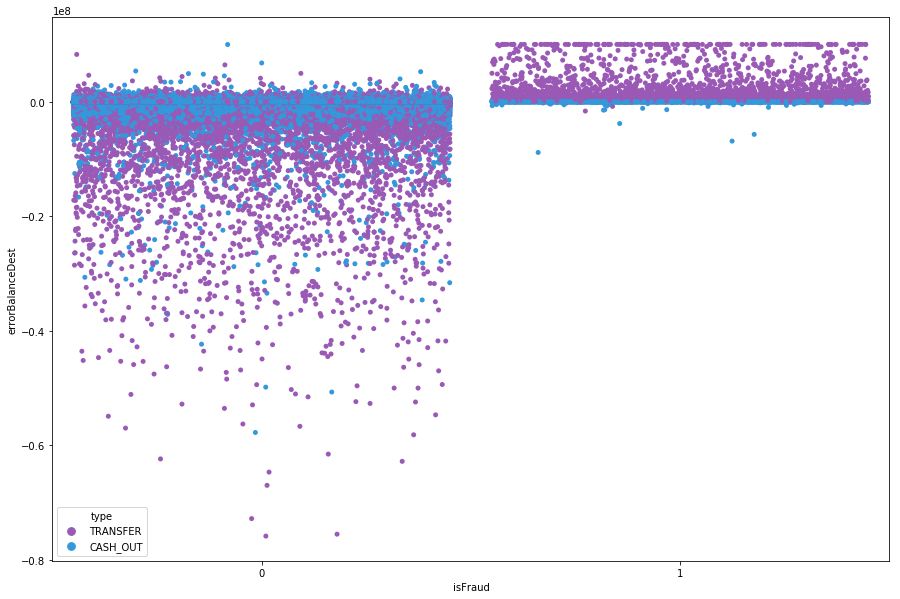

In [135]:
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest
plt.subplots(figsize=(15,10))
ax = sns.stripplot(Y[:], X.errorBalanceDest[:], X.type[:], jitter= 0.45, palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])

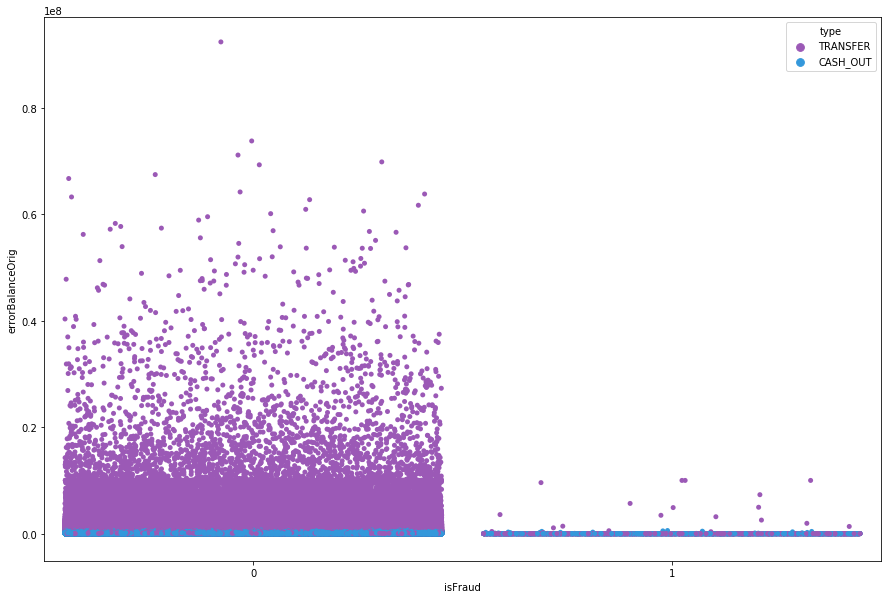

In [137]:
plt.subplots(figsize=(15,10))
ax = sns.stripplot(Y[:], X.errorBalanceOrig[:], X.type[:], jitter= 0.45, palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])

/Users/eduardorodriguez/anaconda2/envs/TFM/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/eduardorodriguez/anaconda2/envs/TFM/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/eduardorodriguez/anaconda2/envs/TFM/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  


(-80180011.9115, 14294286.2815, -36.1, 780.1)

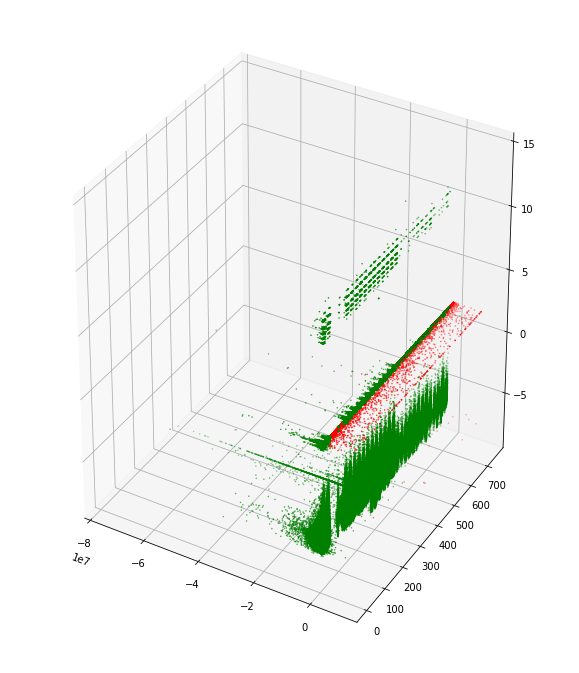

In [133]:
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest
x = 'errorBalanceDest'
y = 'step'
z = 'errorBalanceOrig'
zOffset = 0.2
limit = len(X)

sns.reset_orig() # prevent seaborn from over-riding mplot3d defaults

fig = plt.figure(figsize = (10, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.loc[Y == 0, 'errorBalanceDest'][:limit], X.loc[Y == 0, 'step'][:limit], \
  -np.log10(X.loc[Y == 0, 'errorBalanceOrig'][:limit] + zOffset), c = 'g', marker = '.', \
  s = 1, label = 'genuine')
    
ax.scatter(X.loc[Y == 1, 'errorBalanceDest'][:limit], X.loc[Y == 1, 'step'][:limit], \
  -np.log10(X.loc[Y == 1, 'errorBalanceOrig'][:limit] + zOffset), c = 'r', marker = '.', \
  s = 1, label = 'fraudulent')

plt.axis('tight')


In [99]:
X.shape

(30000, 9)

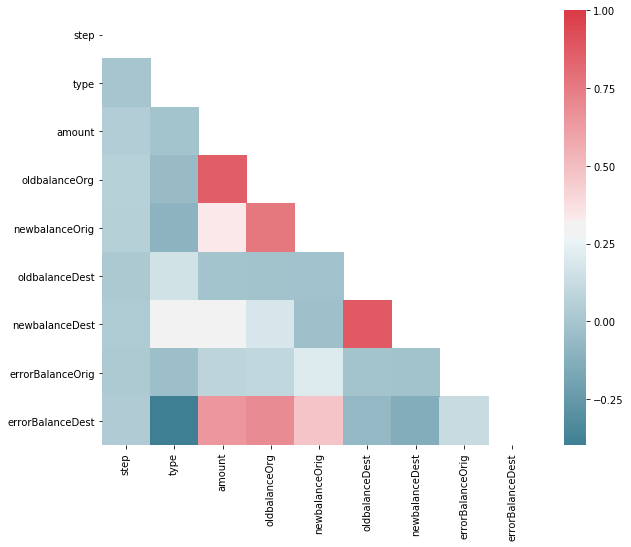

In [127]:
Xfraud = X.loc[Y == 1] # update Xfraud & XnonFraud with cleaned data
XnonFraud = X.loc[Y == 0]

f, ax = plt.subplots(figsize=(10, 8))

Xfraud = Xfraud.corr()

mask = np.zeros_like(Xfraud, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(Xfraud, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

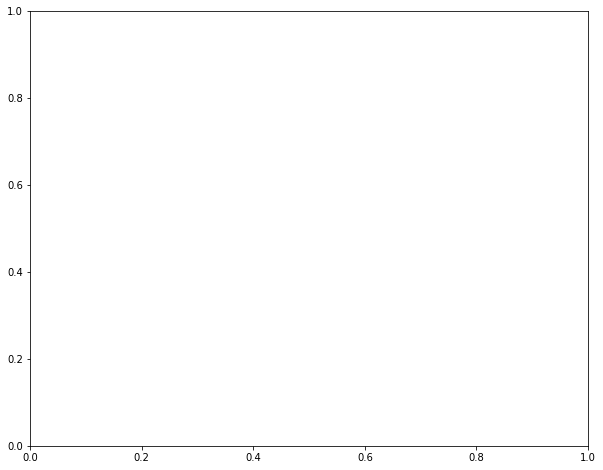

In [138]:
Xfraud = X.loc[Y == 1] # update Xfraud & XnonFraud with cleaned data
XnonFraud = X.loc[Y == 0]

f2, ax2 = plt.subplots(figsize=(10, 8))

Xfraud = Xfraud.corr()


mask = np.zeros_like(XnonFraud, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(XnonFraud, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax2)